# StockPredict
**(Using Deep Learning & Stacked LSTM for Market Forecasting)**

This project aims to predict the future stock prices of Apple Inc. (AAPL) for the next 30 days using a Stacked Long Short-Term Memory (LSTM) model. 

---

Below are the steps involved in the implementation:-

#### 1. Data Collection

Gather historical stock price data for AAPL from a reliable source such as Yahoo Finance or any stock market API.

#### 2. Data Preprocessing

Clean and preprocess the data to make it suitable for training the model.
Split the dataset into training and test sets.

#### 3. Model Creation

Build a Stacked LSTM model to capture sequential patterns in the stock price data.
Tune hyperparameters and compile the model.

#### 4. Prediction

Use the trained model to predict the stock prices for the next 30 days.
Plot the predicted results against the actual values for better visualization and comparison.

#### Output
A graph showing the predicted stock prices for the next 30 days, providing insights into future trends.


In [1]:
# Keras & Tenserflow 2.0

## Data Collection

In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
print("Module imported successfully!")

Module imported successfully!


In [4]:
pdr.get_data_fred('GS10')

,GS10
DATE,
2020-01-01,1.76
2020-02-01,1.50
2020-03-01,0.87
2020-04-01,0.66
2020-05-01,0.67
2020-06-01,0.73
2020-07-01,0.62
2020-08-01,0.65
2020-09-01,0.68


In [5]:
import os
df = pdr.get_data_tiingo('AAPL', api_key=os.getenv('TIINGO_API_KEY'))

C:\Users\User\AppData\Local\Temp\ipykernel_6752\2645736806.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=os.getenv('TIINGO_API_KEY'))


In case of error, **Fix Compatibility Issue**

```!pip install pandas==1.5.3 pandas-datareader==0.10.0```


In [6]:
df.to_csv('AAPL.csv')

This saves the DataFrame to a Comma-Separated Values file.

- A file named ```AAPL.csv``` is created in your current working directory (where your Jupyter notebook or Python script is running).

- The file will contain the data stored in the ```df``` DataFrame in tabular format (rows and columns), with values separated by commas.


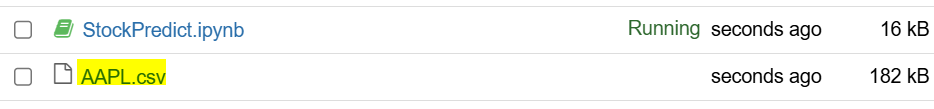

In [7]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-12-27 00:00:00+00:00  289.80  293.97  288.12  291.12  36592936   
       2019-12-30 00:00:00+00:00  291.52  292.69  285.22  289.46  36059614   
       2019-12-31 00:00:00+00:00  293.65  293.68  289.52  289.93  25247625   
       2020-01-02 00:00:00+00:00  300.35  300.60  295.19  296.24  33911864   
       2020-01-03 00:00:00+00:00  297.43  300.58  296.50  297.15  36633878   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-12-27 00:00:00+00:00  70.240238  71.250941  69.833048  70.560173   
       2019-12-30 00:00:00+00:00  70.657123  70.940701  69.130161  70.157831   
       2019-12-31 00:00:00+00:00  71.173381  71.180652  70.172373  70.271747   
       2020-01-02 00:00:00+00:00  72.797293  72.857887  71.546639  71.801132   
       2020-01-03 00:00:00+00:00  72.089558  72.853039  71.864150  72.021693   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-12-27 00:00:00+00:00  146371744      0.0          1.0  
       2019-12-30 00:00:00+00:00  144238456      0.0          1.0  
       2019-12-31 00:00:00+00:00  100990500      0.0          1.0  
       2020-01-02 00:00:00+00:00  135647456      0.0          1.0  
       2020-01-03 00:00:00+00:00  146535512      0.0          1.0

In [14]:
df.tail()

close    high       low    open     volume  \
symbol date                                                                     
AAPL   2024-12-18 00:00:00+00:00  248.05  254.28  247.7400  252.16   56774101   
       2024-12-19 00:00:00+00:00  249.79  252.00  247.0949  247.50   60882264   
       2024-12-20 00:00:00+00:00  254.49  255.00  245.6900  248.04  147495267   
       2024-12-23 00:00:00+00:00  255.27  255.65  253.4500  254.77   40858774   
       2024-12-24 00:00:00+00:00  258.20  258.21  255.2900  255.49   23234705   

                                  adjClose  adjHigh    adjLow  adjOpen  \
symbol date                                                              
AAPL   2024-12-18 00:00:00+00:00    248.05   254.28  247.7400   252.16   
       2024-12-19 00:00:00+00:00    249.79   252.00  247.0949   247.50   
       2024-12-20 00:00:00+00:00    254.49   255.00  245.6900   248.04   
       2024-12-23 00:00:00+00:00    255.27   255.65  253.4500   254.77   
       2024-12-24 00:00:00+00:00    258.20   258.21  255.2900   255.49   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2024-12-18 00:00:00+00:00   56774101      0.0          1.0  
       2024-12-19 00:00:00+00:00   60882264      0.0          1.0  
       2024-12-20 00:00:00+00:00  147495267      0.0          1.0  
       2024-12-23 00:00:00+00:00   40858774      0.0          1.0  
       2024-12-24 00:00:00+00:00   23234705      0.0          1.0

In [18]:
df1 = df.reset_index()['close']

In [24]:
df1

0       289.80
1       291.52
2       293.65
3       300.35
4       297.43
         ...  
1252    248.05
1253    249.79
1254    254.49
1255    255.27
1256    258.20
Name: close, Length: 1257, dtype: float64

In [21]:
df1[1228:]

1228    225.12
1229    228.22
1230    225.00
1231    228.02
1232    228.28
1233    229.00
1234    228.52
1235    229.87
1236    232.87
1237    235.06
1238    234.93
1239    237.33
1240    239.59
1241    242.65
1242    243.01
1243    243.04
1244    242.84
1245    246.75
1246    247.77
1247    246.49
1248    247.96
1249    248.13
1250    251.04
1251    253.48
1252    248.05
1253    249.79
1254    254.49
1255    255.27
1256    258.20
Name: close, dtype: float64

In [23]:
df1.shape

(1257,)

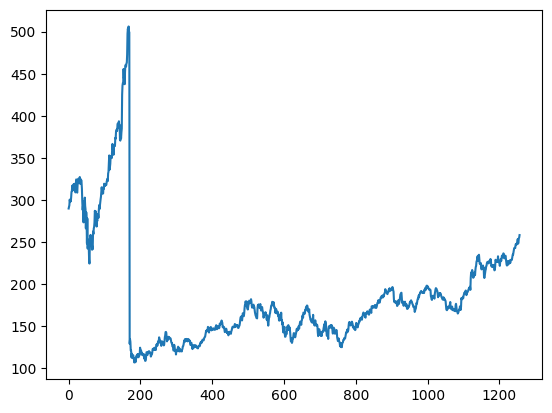

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data, so we will apply MinMax scaler

In [26]:
import numpy as np

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) # we wanna scale it down to 0 and 1
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [31]:
df1 #now it has been converted into array

array([[0.45825924],
       [0.46256731],
       [0.46790232],
       ...,
       [0.36981841],
       [0.37177207],
       [0.37911083]])

In [32]:
df1.shape

(1257, 1)

## Ways to Split Data into Train and Test Sets

#### 1. Random Split (Simple Split)
- Randomly splits data into training and testing sets, e.g., 80% train, 20% test.

>```Python
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)```

```random_state=42``` ensures results are reproducible by fixing the random seed.



#### 2. Cross-Validation (K-Fold)
- Splits data into K equal parts (folds).
- Uses K-1 folds for training and 1 fold for testing, rotating through all folds.


>```Python
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)```

Useful for models where data order doesn't matter.



#### 3. Time Series Split
- Maintains time order of data (important for time-dependent data).
- Splits earlier data for training and later data for testing.


>```Python
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)```

---

## Which Split is Better for Stock Price Prediction?

**Time Series Split!**
You may ask why so?

Because Stock data has time dependency—future values depend on past values.
Random splits may mix past and future data, which violates the time-order relationship.
Time Series Split respects the chronological order and avoids data leakage.


### Splitting dataset into train and test

In [34]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size

train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [35]:
train_size

817

In [36]:
test_size

440

In [39]:
len(train_data),len(test_data)

(817, 440)

In [40]:
train_data

array([[4.58259236e-01],
       [4.62567314e-01],
       [4.67902317e-01],
       [4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],
       [4.91797120e-01],
       [5.07927364e-01],
       [5.09680651e-01],
       [5.26286788e-01],
       [5.15566688e-01],
       [5.12210394e-01],
       [5.21978710e-01],
       [5.30720100e-01],
       [5.25309956e-01],
       [5.28140263e-01],
       [5.31972448e-01],
       [5.29668128e-01],
       [5.06224170e-01],
       [5.28115216e-01],
       [5.44771446e-01],
       [5.43594239e-01],
       [5.07626800e-01],
       [5.05497808e-01],
       [5.31020664e-01],
       [5.37532874e-01],
       [5.46950532e-01],
       [5.33976205e-01],
       [5.37783344e-01],
       [5.32924233e-01],
       [5.51934878e-01],
       [5.46098936e-01],
       [5.46299311e-01],
       [5.31396368e-01],
       [5.42968065e-01],
       [5.34652473e-01],
       [5.16493425e-01],
       [4.79248591e-01],
       [4.53951158e-01],
